<a href="https://colab.research.google.com/github/rajanirajage/Python_Project/blob/main/HR_Analytics_Studying_the_Trend_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# important Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv('/content/HR_comma_sep.csv')

In [ ]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [ ]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [ ]:
df.isnull().sum()

,0
satisfaction_level,0
last_evaluation,0
number_project,0
average_montly_hours,0
time_spend_company,0
Work_accident,0
left,0
promotion_last_5years,0
sales,0
salary,0


In [ ]:
#pivot table to compare the experience of employees who resgined vs who stayed
pivot1 = pd.pivot_table(df,values='promotion_last_5years',index=['time_spend_company'],columns=['left'],aggfunc='count')
pivot1

left,0,1
time_spend_company,,
2,3191.0,53.0
3,4857.0,1586.0
4,1667.0,890.0
5,640.0,833.0
6,509.0,209.0
7,188.0,NaN
8,162.0,NaN
10,214.0,NaN


<Axes: xlabel='time_spend_company'>

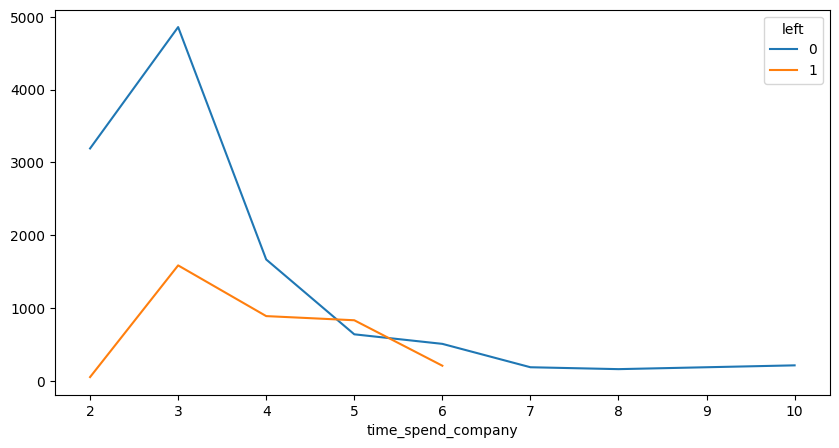

In [ ]:
#Plotting above pivot table
pivot1_reset = pivot1.reset_index()
pivot1_reset.plot(x='time_spend_company', y=[0,1], figsize=(10,5))

In [ ]:
# Actionable Insight 1 ------>Here the line graph displays an interesting market trend. Employess with an experience
#                             between 2-6 years tend to move on to new opportunities. That too more towards the initial
#                             phase of their careers as compared to the later years. Whereas the employees tend to settle
#                             down in the same org towards the later years of their careers. Organisation should try to
#                             tailor effective programs to retain productive employeed with 2-6 years of experience.

In [ ]:
# Creating a new dataframe of good employees who left the organisation

df_new = df[(df['left']==1) & ((df['time_spend_company']>=4) |(df['last_evaluation']>=0.7)| (df['number_project']>5))]
df_new.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low


In [ ]:
#creating a pivot table to correlate satisfaction level of employees with their last year promotions
pivot2 = pd.pivot_table(df_new,values='left',index=['satisfaction_level'
                                                   ],columns=['promotion_last_5years'],aggfunc='count')


display(pivot2)

promotion_last_5years,0,1
satisfaction_level,,
0.09,195.0,NaN
0.10,357.0,NaN
0.11,331.0,3.0
0.12,4.0,NaN
0.13,3.0,NaN
...,...,...
0.88,25.0,NaN
0.89,56.0,NaN
0.90,52.0,NaN


<Axes: xlabel='satisfaction_level'>

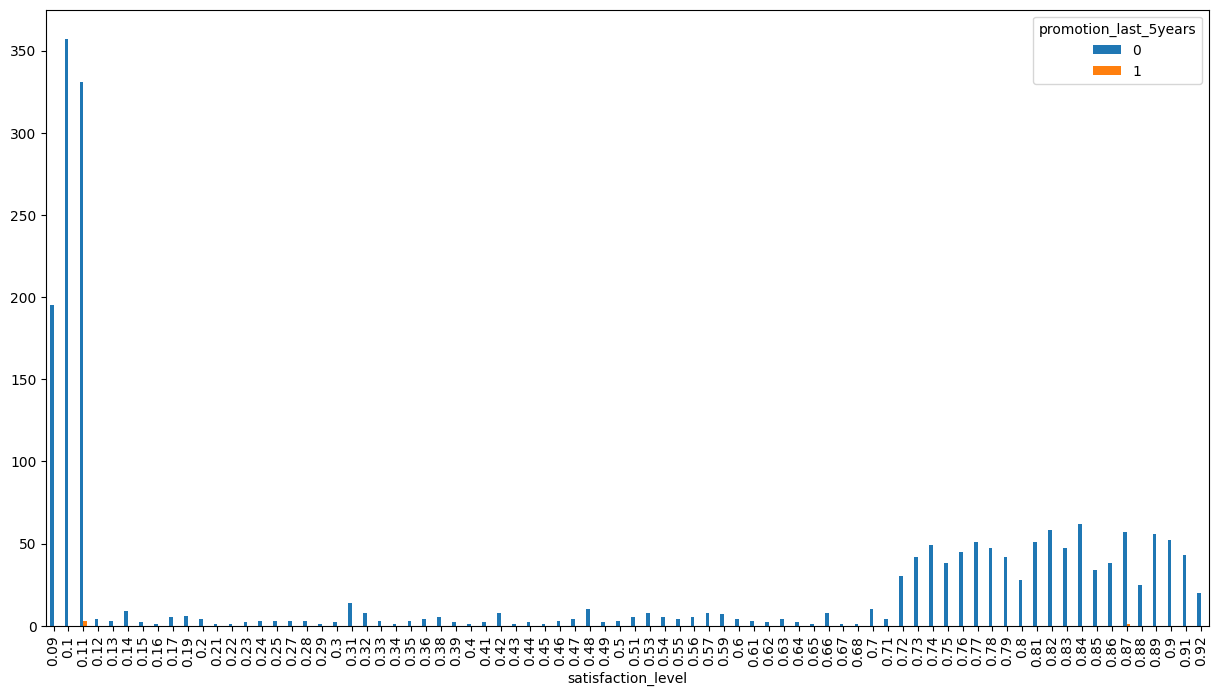

In [ ]:
# Below bar graph confirms low employee satisfaction strongly related to low promtions
pivot2.plot(kind="bar",figsize=(15, 8))

In [ ]:
# Actionable insights----->To improve employees' creativity and productivity, organisations should ensure that they
#                          receive appropriate rewards and acknowledgment, as well as timely promotions. This will also
#                          assure their long-term employment with the organization.